In [33]:
import warnings

warnings.filterwarnings("ignore")

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml_utils import rmse_score, r2_score
from exponential_smoothing import ExponentialSmoothing

In [35]:
PATH = "Walmart.csv"
data = pd.read_csv(PATH)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [37]:
TIME_COLUMN = "Date"
VALUE_COLUMN = "Weekly_Sales"

In [38]:
data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN], format="%d-%m-%Y")

data = data[data["Store"] == 40]
data.set_index(TIME_COLUMN, inplace=True)
data = data[VALUE_COLUMN]

In [39]:
data.head()

Date
2010-02-05    1001943.80
2010-02-12     955338.29
2010-02-19     916289.20
2010-02-26     863917.41
2010-03-05     990152.28
Name: Weekly_Sales, dtype: float64

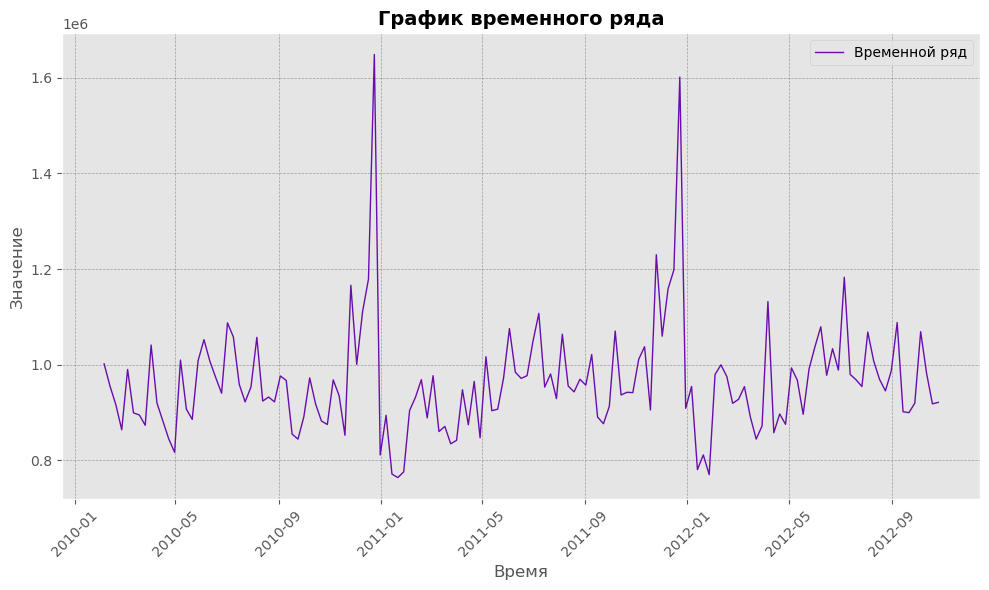

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

plt.plot(data.index, data, label='Временной ряд', color='#6A0DAD', linewidth=1)

plt.title('График временного ряда', fontsize=14, fontweight='bold')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.legend(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(fontsize=10, rotation=45)
plt.tight_layout()
plt.show()


In [41]:
train_len = 0.85

split_index = int(len(data) * train_len)

train = data.iloc[:split_index]
test = data.iloc[split_index:]

In [ ]:
model = ExponentialSmoothing(data=train, seasonal_periods=52)
model.fit()

In [43]:
predictions = pd.DataFrame(model.forecast(len(test)))
predictions.index = test.index
predictions = predictions[0]

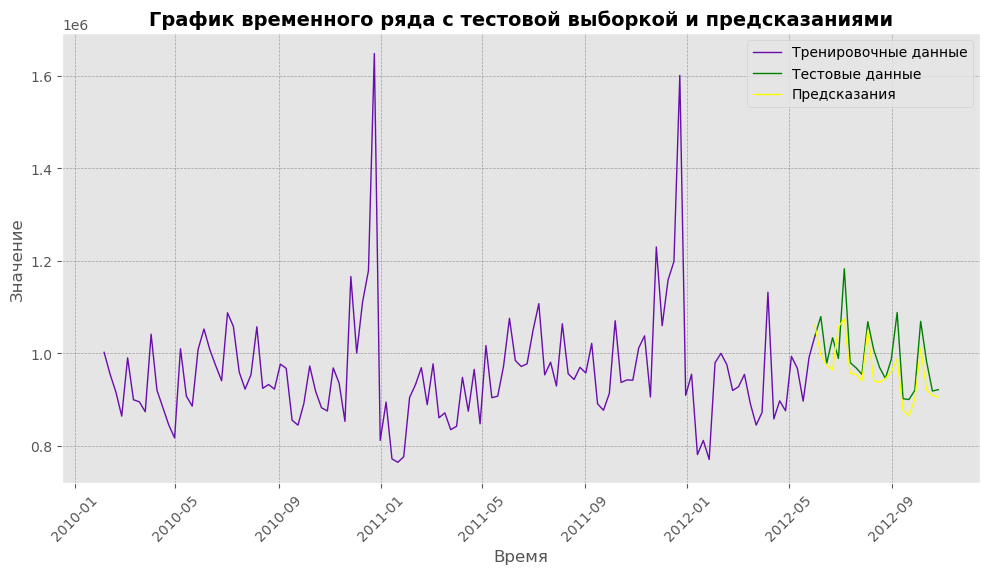

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

train_show = pd.concat([train, test.iloc[:1]], ignore_index=False)
plt.plot(train_show.index, train_show, label='Тренировочные данные', color='#6A0DAD', linewidth=1)

plt.plot(test.index, test, label='Тестовые данные', color='green', linewidth=1)

plt.plot(predictions.index, predictions, label='Предсказания', color='yellow', linewidth=1)

plt.title('График временного ряда с тестовой выборкой и предсказаниями', fontsize=14, fontweight='bold')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.legend(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(fontsize=10, rotation=45)
plt.tight_layout()

plt.show()


In [45]:
difference = test - predictions

difference = difference.dropna() 

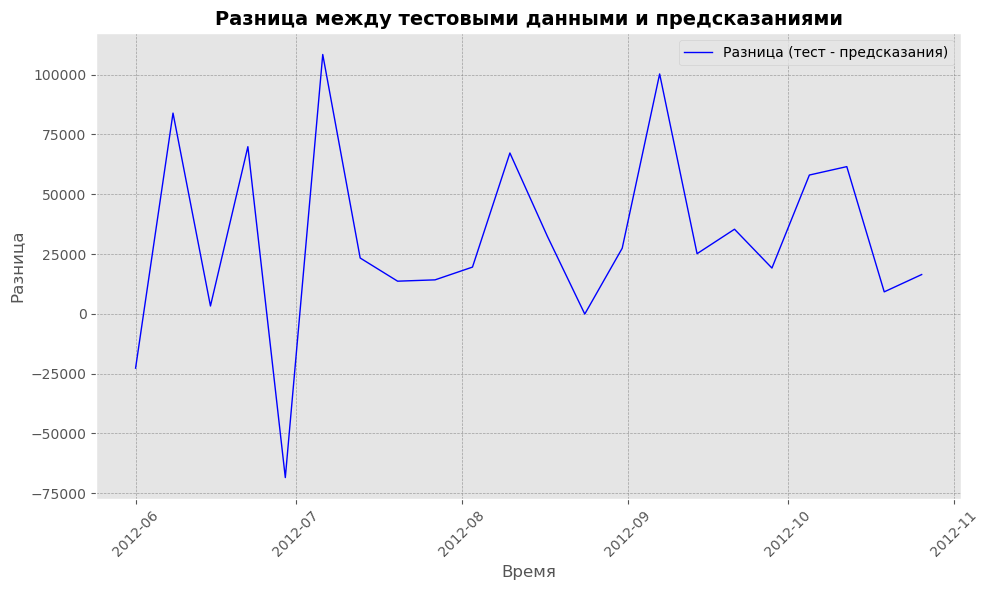

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

plt.plot(difference.index, difference, label='Разница (тест - предсказания)', color='blue', linewidth=1)

plt.title('Разница между тестовыми данными и предсказаниями', fontsize=14, fontweight='bold')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Разница', fontsize=12)
plt.legend(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(fontsize=10, rotation=45)
plt.tight_layout()

plt.show()

In [47]:
rmse = rmse_score(test, predictions)
print("RMSE: ", rmse)

RMSE:  50618.736306519


In [48]:
r2 = r2_score(test, predictions)
print("R2: ", r2)

R2:  0.47068629064359857
